## Importing Libraries

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sn

## Loading the Dataset 

In [7]:
df=pd.read_csv('language.csv')

In [8]:
df.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [9]:
df.shape

(22000, 2)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      22000 non-null  object
 1   language  22000 non-null  object
dtypes: object(2)
memory usage: 343.9+ KB


#### `Checking Null Values `

In [11]:
df.isnull().sum()

Text        0
language    0
dtype: int64

#### `Checking Duplicated Values`

In [12]:
df.duplicated().sum()

141

### `Each Language Contains 1000 sentences`

In [13]:
df['language'].value_counts()

language
Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: count, dtype: int64

------------

## Visualizing the English and Spanish Text using WordCloud

### `For English`

In [14]:
english=df[df['language']=='English']['Text']

english

37       in  johnson was awarded an american institute ...
40       bussy-saint-georges has built its identity on ...
76       minnesotas state parks are spread across the s...
90       nordahl road is a station served by north coun...
97       a talk by takis fotopoulos about the internati...
                               ...                        
21829    on march   empty mirrors press published epste...
21879    he [musk] wants to go to mars to back up human...
21896    overall the male is black above and white belo...
21897    tim reynolds born  december  in wiesbaden germ...
21951    the total high school population was now appro...
Name: Text, Length: 1000, dtype: object

In [15]:
english_text=" ".join(english)

In [16]:
from wordcloud import WordCloud

In [17]:
word=WordCloud(width=800, height=400, background_color='white').generate(english_text)

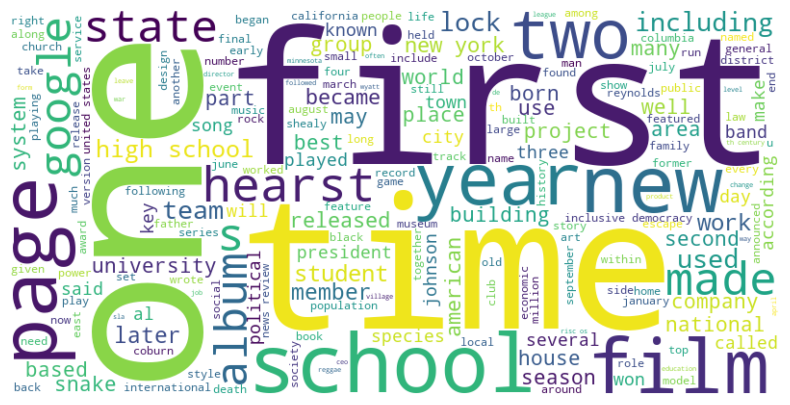

In [18]:
plt.figure(figsize=(10, 5))
plt.imshow(word, interpolation='bilinear')
plt.axis("off")
plt.show()

### `For Spanish`

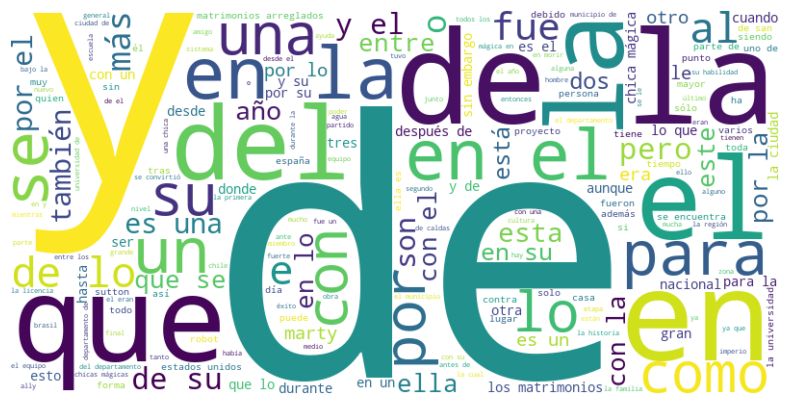

In [19]:
hindi_text=df[df['language']=='Spanish']['Text']
hindi=" ".join(hindi_text)

worda=WordCloud(height=400, width=800, background_color='white').generate(hindi)

plt.figure(figsize=(10, 5))
plt.imshow(worda, interpolation='bilinear')
plt.axis("off")
plt.show()

--------------

---------

# Vectorizer 

In [20]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

## a) CountVectorizer

### `CountVectorizer is like creating a word count table. It takes a collection of text data and converts it into a matrix of token counts. Each row represents a document, and each column represents a unique word (or token). The values in the matrix indicate how many times each word appears in each document.`

### `Count vectorizer does not need to follow any order, it just collects unique words and store it into bags, which is called BAG OF WORDS(BOW).`

In [21]:
count=CountVectorizer()

sentences=["love data science", "love machine learning"]

vectorized_data=count.fit_transform(sentences)

# Get the Vocabulary (unique words)
print(count.get_feature_names_out())

# Convert the result to an array
print(vectorized_data.toarray())

['data' 'learning' 'love' 'machine' 'science']
[[1 0 1 0 1]
 [0 1 1 1 0]]


### `This is case sensitive --> Love and love`

In [22]:
count=CountVectorizer()

sentences=["Love data science", "love machine learning"]

vectorized_data=count.fit_transform(sentences)

# Get the Vocabulary (unique words)
print(count.get_feature_names_out())

# Convert the result to an array
print(vectorized_data.toarray())

['data' 'learning' 'love' 'machine' 'science']
[[1 0 1 0 1]
 [0 1 1 1 0]]


### `It does not take I as a word` 

In [23]:
count=CountVectorizer()

sentences=["I Love data science", "love machine learning"]

vectorized_data=count.fit_transform(sentences)

# Get the Vocabulary (unique words)
print(count.get_feature_names_out())

# Convert the result to an array
print(vectorized_data.toarray())

['data' 'learning' 'love' 'machine' 'science']
[[1 0 1 0 1]
 [0 1 1 1 0]]


## b) TfidfVectorizer

### `While CountVectorizer just counts the words, TfidfVectorizer goes a step further and also considers the importance of words across all documents. It assigns more weight to words that appear frequently in a single document but are rare across other documents, making it better for distinguishing between words like “the” and actual meaningful terms.`

### `Using the same sentences as above, the matrix generated by TfidfVectorizer will contain decimal values instead of just counts, representing the importance of each word in a given document.`

In [24]:
tf=TfidfVectorizer()

sentences=["Love data science", "love machine learning"]

vec_data=tf.fit_transform(sentences)

print(tf.get_feature_names_out())

print(vec_data.toarray())

['data' 'learning' 'love' 'machine' 'science']
[[0.6316672  0.         0.44943642 0.         0.6316672 ]
 [0.         0.6316672  0.44943642 0.6316672  0.        ]]


-------------

-----------

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

from sklearn.naive_bayes import MultinomialNB

## Conerting all the text into arrays

In [26]:
X=np.array(df['Text'])
Y=np.array(df['language'])

In [27]:
print(X)

['klement gottwaldi surnukeha palsameeriti ning paigutati mausoleumi surnukeha oli aga liiga hilja ja oskamatult palsameeritud ning hakkas ilmutama lagunemise tundemärke  aastal viidi ta surnukeha mausoleumist ära ja kremeeriti zlíni linn kandis aastatel – nime gottwaldov ukrainas harkivi oblastis kandis zmiivi linn aastatel – nime gotvald'
 'sebes joseph pereira thomas  på eng the jesuits and the sino-russian treaty of nerchinsk  the diary of thomas pereira bibliotheca instituti historici s i --   rome libris '
 'ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เริ่มตั้งแต่ถนนสนามไชยถึงแม่น้ำเจ้าพระยาที่ถนนตก กรุงเทพมหานคร เป็นถนนรุ่นแรกที่ใช้เทคนิคการสร้างแบบตะวันตก ปัจจุบันผ่านพื้นที่เขตพระนคร เขตป้อมปราบศัตรูพ่าย เขตสัมพันธวงศ์ เขตบางรัก เขตสาทร และเขตบางคอแหลม'
 ...
 'con motivo de la celebración del septuagésimoquinto ° aniversario de la fundación del departamento en  guillermo ceballos espinosa presentó a la gobernación de caldas por encargo de su titular dilia estrada de gómez el h

In [28]:
print(Y)

['Estonian' 'Swedish' 'Thai' ... 'Spanish' 'Chinese' 'Romanian']


---------

## Conerting all of Text into BOW and then conert into vectors

In [29]:
cv=CountVectorizer()

X=cv.fit_transform(X)

In [30]:
X

<22000x277720 sparse matrix of type '<class 'numpy.int64'>'
	with 913598 stored elements in Compressed Sparse Row format>

## Train Test Split

In [31]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.3, random_state=42)

In [32]:
print(X.shape,X_train.shape, X_test.shape)

(22000, 277720) (15400, 277720) (6600, 277720)


## Model Training 

In [33]:
model=MultinomialNB()

In [34]:
model.fit(X_train,Y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


## Model Evaluation

In [35]:
y_pred=model.predict(X_test)

accuracy_score(Y_test, y_pred)

0.9528787878787879

#### `Classification Report` 

In [36]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       300
     Chinese       0.93      0.51      0.65       291
       Dutch       0.98      0.98      0.98       313
     English       0.69      1.00      0.82       289
    Estonian       0.99      0.96      0.97       308
      French       0.94      0.99      0.96       287
       Hindi       1.00      0.98      0.99       314
  Indonesian       0.99      0.98      0.98       295
    Japanese       0.70      0.87      0.77       302
      Korean       1.00      0.98      0.99       296
       Latin       0.99      0.90      0.94       312
     Persian       1.00      1.00      1.00       299
   Portugese       1.00      0.96      0.98       293
      Pushto       1.00      0.97      0.98       303
    Romanian       0.99      0.98      0.99       291
     Russian       0.99      0.99      0.99       302
     Spanish       0.97      0.99      0.98       287
     Swedish       0.99    

------------

# Prediction

### `Wrapping user in [] ensures it's a list, which CountVectorizer can process correctly.`

In [37]:
user=input("Enter the text")
array_data=[user]
d_t=cv.transform(array_data)
    
result=model.predict(d_t)
    
print(result)

['French']


In [38]:
user=input("Enter the text")
array_data=[user]
d_t=cv.transform(array_data)
    
result=model.predict(d_t)
    
print(result)

['English']


## Creating a function

In [39]:
def lang_detect(user):
    array_data = [user]  # Convert input to a list
    d_t = cv.transform(array_data).toarray()  # Transform using CountVectorizer
    result = model.predict(d_t)  # Predict using the trained model
    return result


u_i="क्या आप अंग्रेज़ी बोलते हैं?"

lang_detect(u_i)

array(['Hindi'], dtype='<U10')

In [40]:
u_i="Tu as une maison"

lang_detect(u_i)

array(['French'], dtype='<U10')

-------------

## Saving the Models

In [41]:
import pickle

In [42]:
pickle.dump(model, open('Model.pkl', "wb"))

In [43]:
pickle.dump(cv, open('Vectorizer.pkl', "wb"))

In [ ]:
# streamlit run app.py
# for run the streamlit application app.py